In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [223]:
#Loading the coursera_data.csv into a DataFrame data
data=pd.read_csv('coursea_data.csv')
#Checking the dimensions of data
print(data.shape)
#Seeing the first five rows of data
data.head()

(891, 7)


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [224]:
#Renaming the first column name 'Unnamed: 0' to 'ID'
data.rename(columns = {'Unnamed: 0':'ID'}, inplace = True) 
#Seeing the first five rows of data after renaming the column
data.head()

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [225]:
#Summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [226]:
#Checking if any column has any missing element
data.isnull().sum()

ID                          0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [227]:
data.dtypes

ID                            int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [228]:
#In the above dtypes of each columns, we have for the column 'course_students_enrolled' as object
#Ideally, we want it to be int or float. We choose int
data.course_students_enrolled

0      5.3k
1       17k
2      130k
3       91k
4      320k
       ... 
886     52k
887     21k
888     30k
889    9.8k
890     38k
Name: course_students_enrolled, Length: 891, dtype: object

In [229]:
data.dtypes

ID                            int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [0]:
#Borrowed this code cell from Devanshu Ramaiya
std_enroll = []
for i in range(0, len(data)):
    try:
        num = data['course_students_enrolled'].str.split('k')[i][0]
        num = float(num) * 1000 
        std_enroll.append(num)
    except:
        num = data['course_students_enrolled'].str.split('m')[i][0]
        num = float(num) * 1000000
        std_enroll.append(num)
data['course_students_enrolled'] = std_enroll
data['course_students_enrolled'] = data['course_students_enrolled'].astype(float)

In [231]:
data.describe()

,ID,course_rating,course_students_enrolled
count,891.000000,891.000000,8.910000e+02
mean,445.000000,4.677329,9.055208e+04
std,257.353842,0.162225,1.819365e+05
min,0.000000,3.300000,1.500000e+03
25%,222.500000,4.600000,1.750000e+04
50%,445.000000,4.700000,4.200000e+04
75%,667.500000,4.800000,9.950000e+04
max,890.000000,5.000000,3.200000e+06


In [233]:
data.head()

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


In [234]:
data.shape

(891, 7)

## Which organization has the most number of courses?

In [0]:
data['count']=data.course_Certificate_type.str.contains('COURSE').astype(int)

In [236]:
data.head()

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,count
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0,0
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0,1
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0,1
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0,1
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0,1


In [237]:
E=data.groupby('course_organization').sum().sort_values('count').tail(20)
E['count']

#University of Pennsylvania has highest number of courses

course_organization
Pontificia Universidad Católica de Chile       7
The University of Edinburgh                    8
University of Alberta                          8
Universiteit Leiden                            9
University of Colorado Boulder                 9
Georgia Institute of Technology                9
University of Illinois at Urbana-Champaign    10
Universidad Nacional Autónoma de México       10
University of California, Davis               11
University of California, Irvine              12
deeplearning.ai                               12
IBM                                           13
Stanford University                           15
University of Virginia                        16
Yale University                               16
Johns Hopkins University                      17
Google Cloud                                  17
Duke University                               22
University of Michigan                        30
University of Pennsylvania                    44


## Average course rating of the organizations with more than 10 courses?

In [240]:
E2=E[E['count'] > 10]
E2

,ID,course_rating,course_students_enrolled,count
course_organization,,,,
"University of California, Davis",8226,97.0,1278700.0,11
"University of California, Irvine",10547,124.1,4326000.0,12
deeplearning.ai,3123,75.9,2863400.0,12
IBM,5339,101.5,2956400.0,13
Stanford University,5892,76.3,4854000.0,15
University of Virginia,7946,89.6,1556000.0,16
Yale University,5615,81.9,3952000.0,16
Johns Hopkins University,9686,130.5,4298900.0,17
Google Cloud,12770,155.8,2604300.0,17


In [241]:
E2.index

Index(['University of California, Davis', 'University of California, Irvine',
       'deeplearning.ai', 'IBM', 'Stanford University',
       'University of Virginia', 'Yale University', 'Johns Hopkins University',
       'Google Cloud', 'Duke University', 'University of Michigan',
       'University of Pennsylvania'],
      dtype='object', name='course_organization')

In [0]:
E4=data.groupby('course_organization').mean().sort_values(by='course_rating', ascending=False,)['course_rating']


In [243]:
E4.loc[E2.index]

course_organization
University of California, Davis     4.619048
University of California, Irvine    4.596296
deeplearning.ai                     4.743750
IBM                                 4.613636
Stanford University                 4.768750
University of Virginia              4.715789
Yale University                     4.817647
Johns Hopkins University            4.660714
Google Cloud                        4.582353
Duke University                     4.664286
University of Michigan              4.729268
University of Pennsylvania          4.696610
Name: course_rating, dtype: float64

## Which organization has the highest course rating?

In [258]:
E4=data.groupby('course_organization').mean().sort_values(by='course_rating', ascending=False,)
E4.head(10)

,ID,course_rating,course_students_enrolled,count
course_organization,,,,
Hebrew University of Jerusalem,395.0,4.900000,95000.0,1.000000
"Nanyang Technological University, Singapore",377.0,4.900000,47000.0,1.000000
Universidade Estadual de Campinas,386.0,4.900000,17000.0,1.000000
Crece con Google,363.0,4.900000,8800.0,0.000000
London Business School,72.0,4.900000,57000.0,1.000000
Google - Spectrum Sharing,106.0,4.900000,210000.0,1.000000
ScrumTrek,846.0,4.900000,12000.0,1.000000
Universidade de São Paulo,616.0,4.866667,68500.0,0.666667
The University of Chicago,541.5,4.850000,84000.0,1.000000


In [260]:
E4[E4.course_rating==4.9]

,ID,course_rating,course_students_enrolled,count
course_organization,,,,
Hebrew University of Jerusalem,395.0,4.9,95000.0,1.0
"Nanyang Technological University, Singapore",377.0,4.9,47000.0,1.0
Universidade Estadual de Campinas,386.0,4.9,17000.0,1.0
Crece con Google,363.0,4.9,8800.0,0.0
London Business School,72.0,4.9,57000.0,1.0
Google - Spectrum Sharing,106.0,4.9,210000.0,1.0
ScrumTrek,846.0,4.9,12000.0,1.0


## Top 5 courses on Coursera by course rating?

In [261]:
data.groupby('course_title')['course_rating'].mean()

course_title
(ISC)² Systems Security Certified Practitioner (SSCP)                             4.7
A Crash Course in Causality:  Inferring Causal Effects from Observational Data    4.7
A Crash Course in Data Science                                                    4.5
A Law Student's Toolkit                                                           4.7
A Life of Happiness and Fulfillment                                               4.8
                                                                                 ... 
Программирование на Python                                                        4.5
Психолингвистика (Psycholinguistics)                                              4.8
Разработка интерфейсов: вёрстка и JavaScript                                      4.5
Русский как иностранный                                                           4.6
Финансовые инструменты для частного инвестора                                     4.7
Name: course_rating, Length: 888, dtype: 

In [264]:
data.groupby('course_title').mean().sort_values(by='course_rating', ascending=False,).head()

,ID,course_rating,course_students_enrolled,count
course_title,,,,
Infectious Disease Modelling,401.0,5.0,1600.0,0.0
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho,789.0,5.0,1500.0,1.0
Stories of Infection,657.0,4.9,28000.0,1.0
Boosting Creativity for Innovation,645.0,4.9,9500.0,1.0
"Brand Management: Aligning Business, Brand and Behaviour",72.0,4.9,57000.0,1.0


In [0]:
## Does course difficulty affect number of students enrolled?

## Does course difficulty affect number of students enrolled?


In [280]:
E4=data.groupby('course_difficulty').mean().sort_values(by='course_rating', ascending=False,).head()
E4

,ID,course_rating,course_students_enrolled,count
course_difficulty,,,,
Mixed,495.401070,4.708556,133633.155080,1.000000
Beginner,418.798768,4.680903,81974.948665,0.579055
Intermediate,462.126263,4.646465,73264.141414,0.525253
Advanced,442.052632,4.600000,66547.368421,0.473684


In [284]:
E4.loc[:,'course_students_enrolled']

course_difficulty
Mixed           133633.155080
Beginner         81974.948665
Intermediate     73264.141414
Advanced         66547.368421
Name: course_students_enrolled, dtype: float64

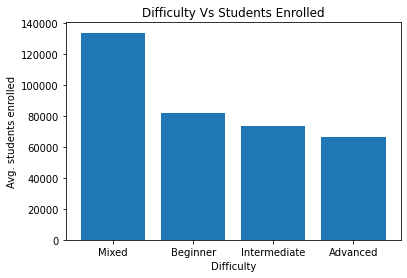

In [292]:
plt.bar(E4.index,E4.loc[:,'course_students_enrolled'])
plt.xlabel('Difficulty')
plt.ylabel('Avg. students enrolled')
plt.title('Difficulty Vs Students Enrolled')
#plt.grid()
plt.show()

## Does course difficulty affect rating?

In [294]:
E4=data.groupby('course_difficulty').mean().sort_values(by='course_rating', ascending=False,).head()
E4

,ID,course_rating,course_students_enrolled,count
course_difficulty,,,,
Mixed,495.401070,4.708556,133633.155080,1.000000
Beginner,418.798768,4.680903,81974.948665,0.579055
Intermediate,462.126263,4.646465,73264.141414,0.525253
Advanced,442.052632,4.600000,66547.368421,0.473684


In [295]:
E4.loc[:,'course_rating']

course_difficulty
Mixed           4.708556
Beginner        4.680903
Intermediate    4.646465
Advanced        4.600000
Name: course_rating, dtype: float64

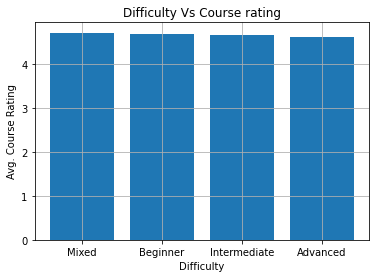

In [299]:
plt.bar(E4.index,E4.loc[:,'course_rating'])
plt.xlabel('Difficulty')
plt.ylabel('Avg. Course Rating')
plt.title('Difficulty Vs Course rating')
plt.grid()
plt.show()
## No, course difficulty doesn't effect course rating since as the
## difficulty increase less number of students take the course

## Does certificate type impact number of students enrolled?

In [302]:
E5=data.groupby('course_Certificate_type').mean().sort_values(by='course_students_enrolled', ascending=False,).head()
E5

,ID,course_rating,course_students_enrolled,count
course_Certificate_type,,,,
PROFESSIONAL CERTIFICATE,102.583333,4.700000,190700.000000,0.0
SPECIALIZATION,314.555556,4.618182,91791.919192,0.0
COURSE,518.627148,4.707045,87854.467354,1.0


In [304]:
E5.loc[:,'course_students_enrolled']

course_Certificate_type
PROFESSIONAL CERTIFICATE    190700.000000
SPECIALIZATION               91791.919192
COURSE                       87854.467354
Name: course_students_enrolled, dtype: float64

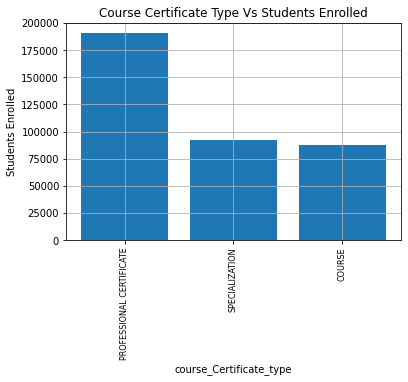

In [308]:
plt.bar(E5.index,E5.loc[:,'course_students_enrolled'])
plt.xlabel('Course_Certificate_type')
plt.xticks(E5.index, rotation='vertical', size=8)
plt.ylabel('Students Enrolled')
plt.title('Course Certificate Type Vs Students Enrolled')
plt.grid()
plt.show()
## Yes, course certificate type effects student enrollment in a course

## Does certificate type impact course rating?

In [311]:
E6=data.groupby('course_Certificate_type').mean().sort_values(by='course_rating', ascending=False,).head()
E6

,ID,course_rating,course_students_enrolled,count
course_Certificate_type,,,,
COURSE,518.627148,4.707045,87854.467354,1.0
PROFESSIONAL CERTIFICATE,102.583333,4.700000,190700.000000,0.0
SPECIALIZATION,314.555556,4.618182,91791.919192,0.0


In [312]:
E6.loc[:,'course_rating']

course_Certificate_type
COURSE                      4.707045
PROFESSIONAL CERTIFICATE    4.700000
SPECIALIZATION              4.618182
Name: course_rating, dtype: float64

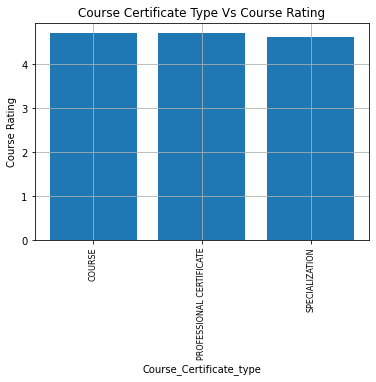

In [314]:
plt.bar(E6.index,E6.loc[:,'course_rating'])
plt.xlabel('Course_Certificate_type')
plt.xticks(E6.index, rotation='vertical', size=8)
plt.ylabel('Course Rating')
plt.title('Course Certificate Type Vs Course Rating')
plt.grid()
plt.show()

## No,certificate type DOES NOT impact course rating

## Number of students enrolled vs. course rating?

In [328]:
E8=data.course_rating
print(E8.shape)
E9=data.course_students_enrolled
print(E9.shape)


(891,)
(891,)


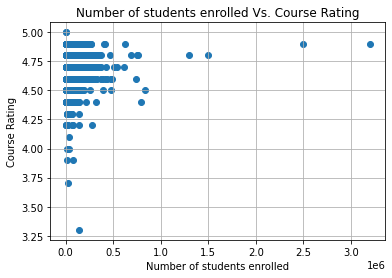

In [334]:
plt.scatter(E9,E8)
plt.title('Number of students enrolled Vs. Course Rating')
plt.xlabel('Number of students enrolled')
plt.ylabel('Course Rating')
plt.grid()
plt.show()
